In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import pandas as pd

In [4]:
model_df = pd.read_csv('data/climate_nonnull.csv')
model_df.columns

Index(['Unnamed: 0', 'population_density', 'risk_score', 'income', 'white_pct',
       'black_pct', 'asian_pct', 'hispanic_pct', 'ed_pct', 'tax_paid_2022',
       'tax_trend', 'unemployment_rate', 'price'],
      dtype='object')

In [5]:
# features_set_1 = ['risk_value', 'risk_score', 'population', 'price','tax_paid_2022','tax_trend','unemployment_rate']
features_set_0 = ['population_density', 'income', 'white_pct',
       'black_pct', 'asian_pct', 'hispanic_pct', 'ed_pct', 'tax_paid_2022',
       'tax_trend', 'unemployment_rate']
target = 'price'
X = model_df[features_set_0]
y = model_df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
print("Length of X:", len(X_train))
print("Length of y:", len(y_train))

Length of X: 2138
Length of y: 2138


In [7]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [8]:
print("Regression:", model.coef_)
print("Intersection:", model.intercept_)
print(" MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Regression: [ 2.09634578e+01  4.27412362e+00 -1.93267263e+05 -2.66834310e+05
  1.57073354e+05 -8.98044871e+04  4.43131761e+03 -6.36597047e-01
  1.85010993e+03  1.51824247e+04]
Intersection: 14860.14147126011
 MSE: 10546429916.50123
R2 Score: 0.6395602703080051


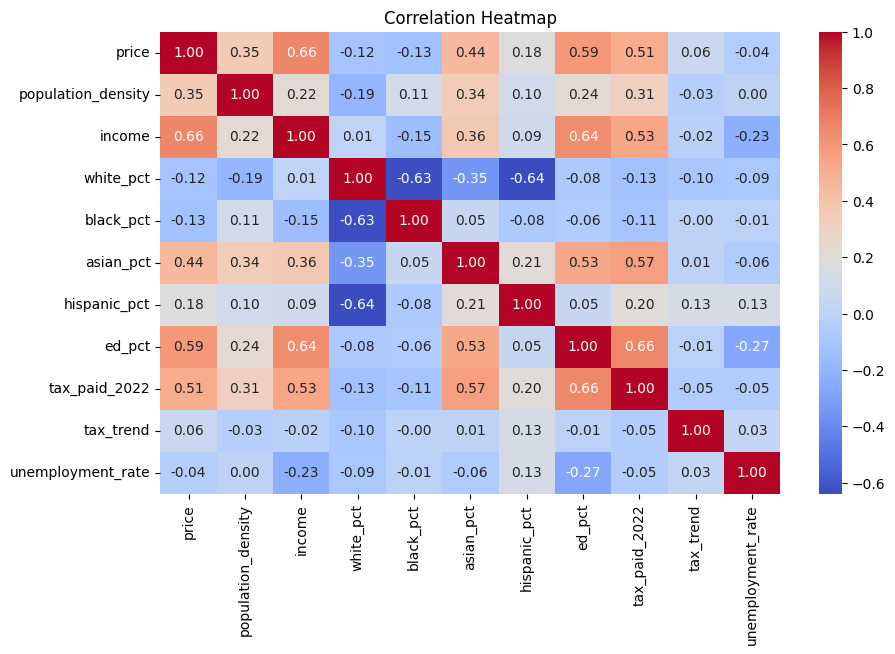

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns
columns = ['price','population_density', 'income', 'white_pct',
       'black_pct', 'asian_pct', 'hispanic_pct', 'ed_pct', 'tax_paid_2022',
       'tax_trend', 'unemployment_rate']

# Correlation heatmap
plt.figure(figsize=(10, 6))
correlation_matrix = model_df[columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

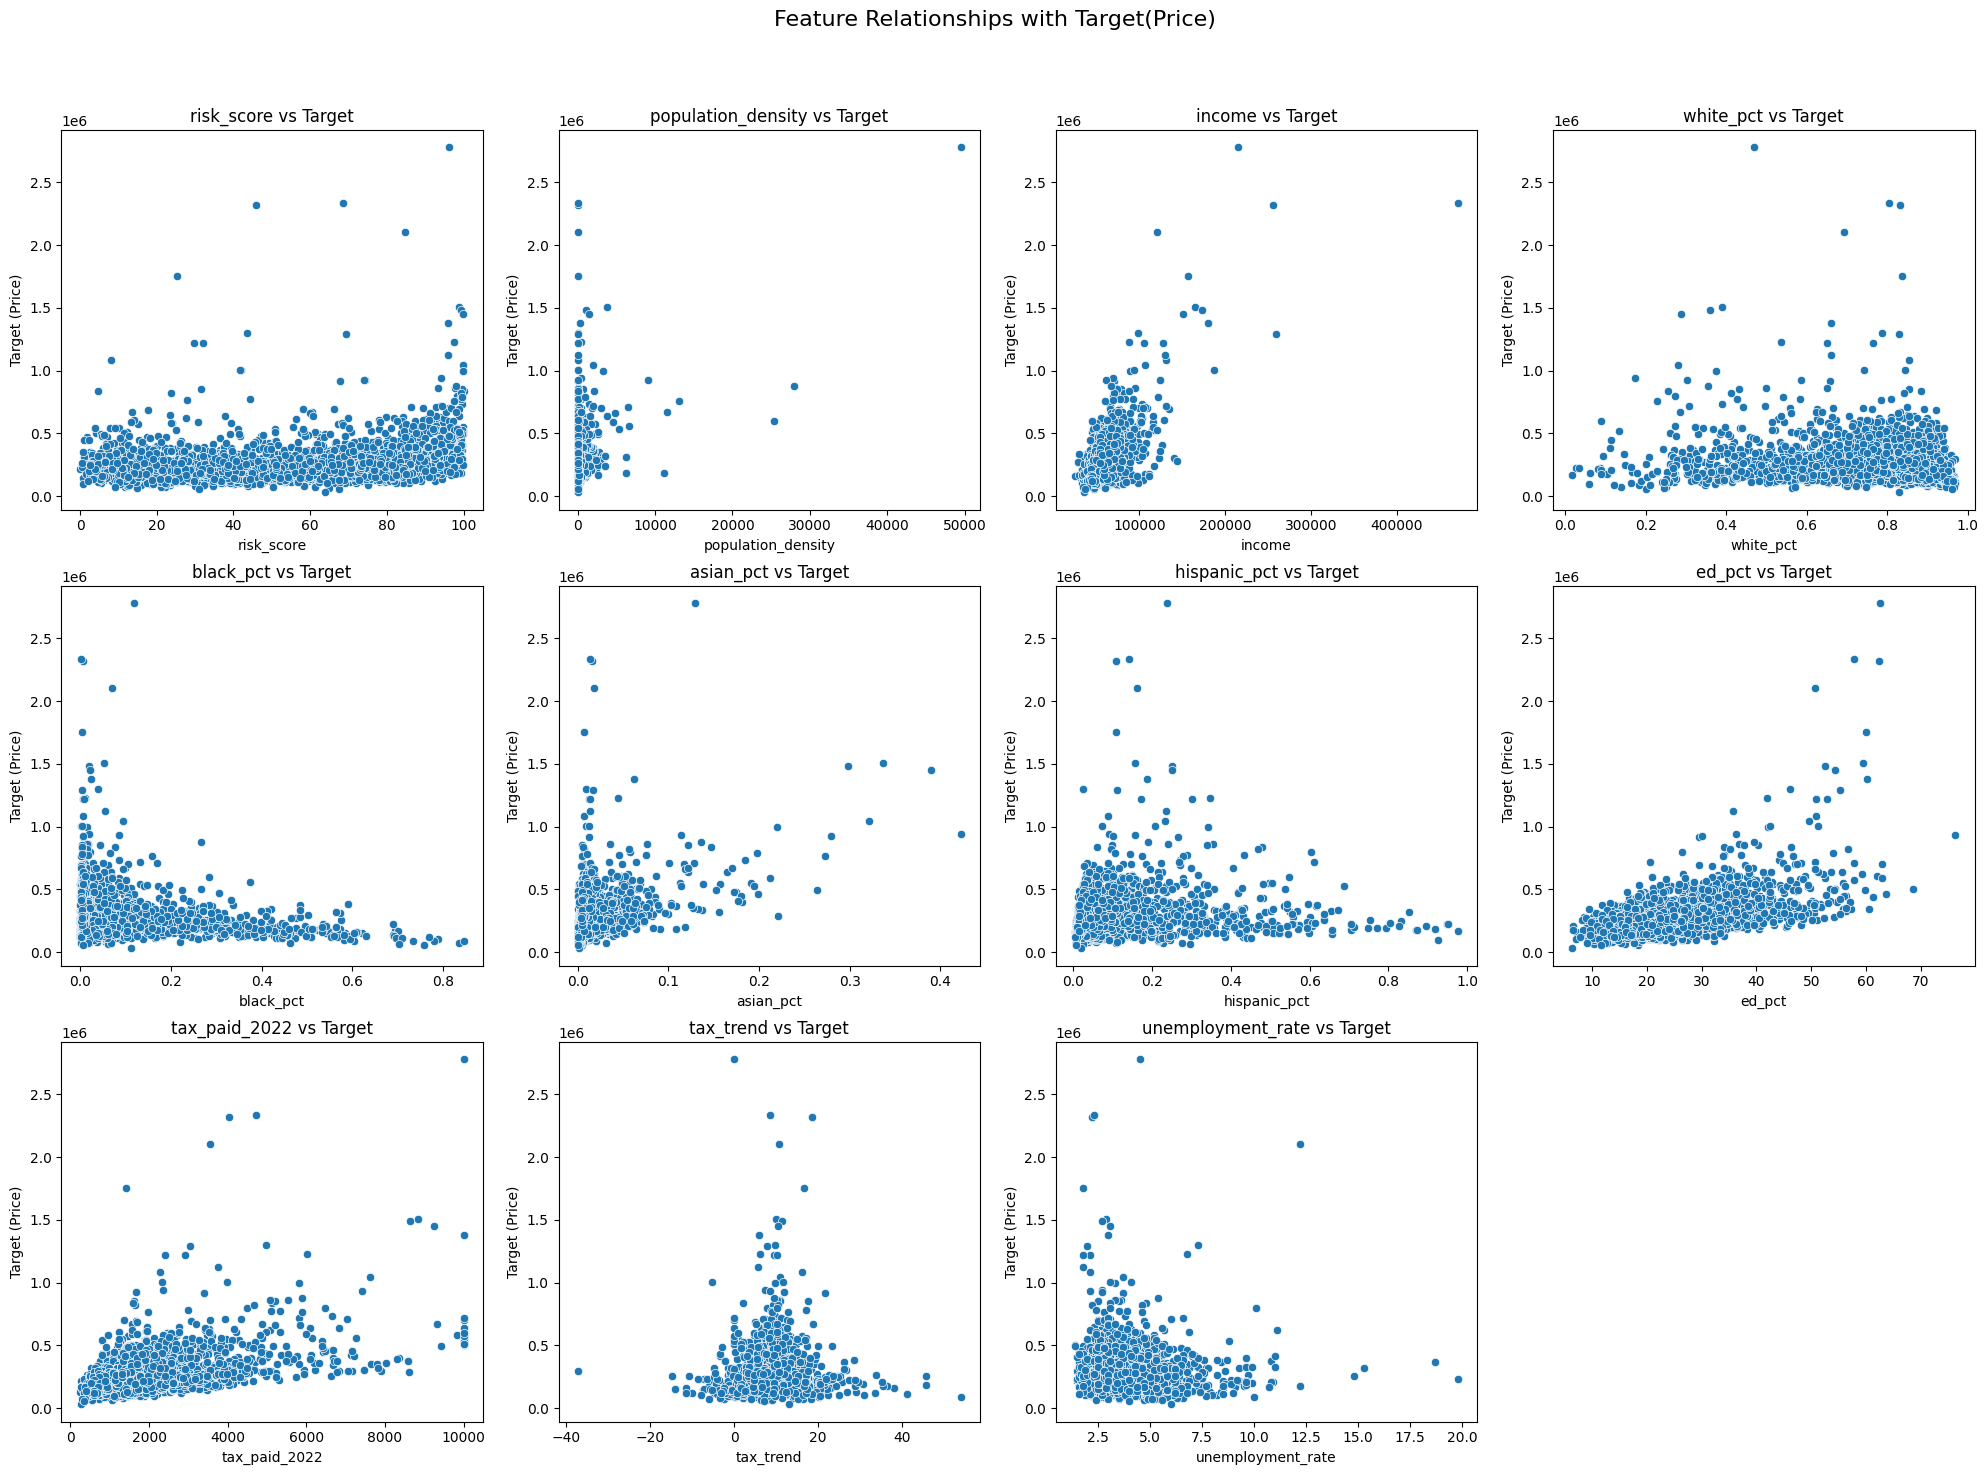

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the features and target variable
features = ['risk_score', 'population_density', 'income', 
            'white_pct', 'black_pct', 'asian_pct', 'hispanic_pct', 
            'ed_pct', 'tax_paid_2022', 'tax_trend', 'unemployment_rate']
target = 'price'
X = model_df[features]
y = model_df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Create a 3x4 grid for plotting
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
fig.suptitle('Feature Relationships with Target(Price)', fontsize=16)

# Flatten the axes for easy iteration
axes = axes.flatten()

# Plot each feature against the target
for i, feature in enumerate(features):
    sns.scatterplot(x=X[feature], y=y, ax=axes[i])
    axes[i].set_title(f"{feature} vs Target")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Target (Price)')

# Remove empty subplots if the number of features < grid cells
for j in range(len(features), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # To make room for the main title
plt.show()


## RISK SCORE

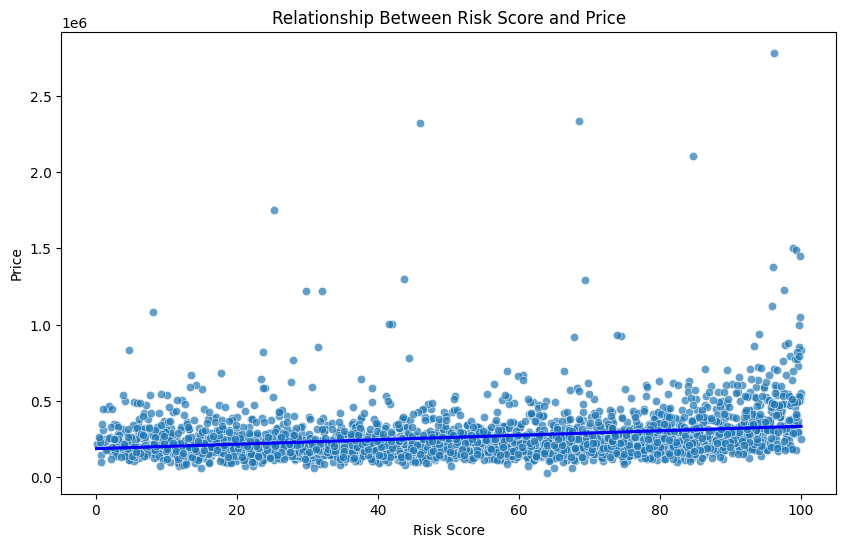

Polynomial Model - MSE: 25017986809.58, R²: 0.11
Linear Model - MSE: 26302337154.31, R²: 0.06


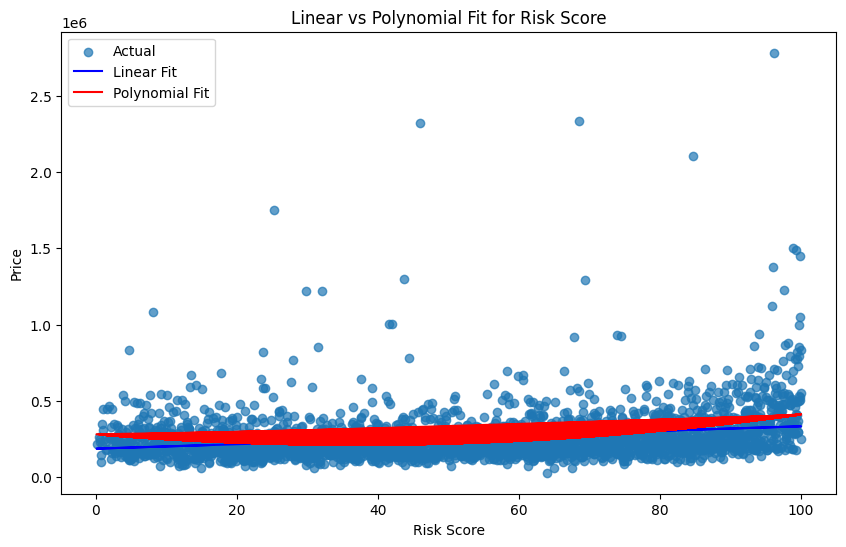

In [20]:
# risk_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures


X = model_df[['risk_score']]
y = model_df['price']

# Step 1: Visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X['risk_score'], y=y, alpha=0.7)
sns.regplot(x=X['risk_score'], y=y, scatter=False, color="blue", ci=None)
plt.title("Relationship Between Risk Score and Price")
plt.xlabel("Risk Score")
plt.ylabel("Price")
plt.show()

# Step 2: Test non-linear effects (polynomial terms)
# Add polynomial terms
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Fit a linear regression model with polynomial terms
model_poly = LinearRegression()
model_poly.fit(X_poly, y)
y_pred_poly = model_poly.predict(X_poly)

# Model evaluation
mse_poly = mean_squared_error(y, y_pred_poly)
r2_poly = r2_score(y, y_pred_poly)
print(f"Polynomial Model - MSE: {mse_poly:.2f}, R²: {r2_poly:.2f}")

# Step 3: Compare with linear model
model_linear = LinearRegression()
model_linear.fit(X, y)
y_pred_linear = model_linear.predict(X)

# Model evaluation for linear model
mse_linear = mean_squared_error(y, y_pred_linear)
r2_linear = r2_score(y, y_pred_linear)
print(f"Linear Model - MSE: {mse_linear:.2f}, R²: {r2_linear:.2f}")

# Step 4: Plot the predictions for both models
plt.figure(figsize=(10, 6))
plt.scatter(X['risk_score'], y, alpha=0.7, label="Actual")
plt.plot(X['risk_score'], y_pred_linear, color="blue", label="Linear Fit")
plt.plot(X['risk_score'], y_pred_poly, color="red", label="Polynomial Fit")
plt.title("Linear vs Polynomial Fit for Risk Score")
plt.xlabel("Risk Score")
plt.ylabel("Price")
plt.legend()
plt.show()


Log-Transformed Model - MSE: 27199445394.81, R²: 0.03


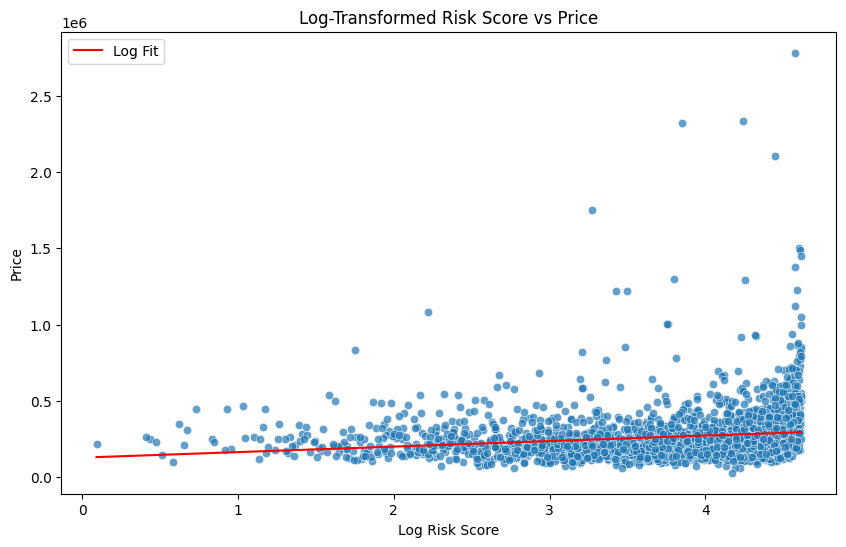

In [24]:
# Log-transform risk_score
model_df['log_risk_score'] = np.log1p(model_df['risk_score'])  # log(1 + x) to handle zeros

# Fit a linear model with log-transformed risk_score
X_log = model_df[['log_risk_score']]
model_log = LinearRegression()
model_log.fit(X_log, y)
y_pred_log = model_log.predict(X_log)

# Model evaluation
mse_log = mean_squared_error(y, y_pred_log)
r2_log = r2_score(y, y_pred_log)

print(f"Log-Transformed Model - MSE: {mse_log:.2f}, R²: {r2_log:.2f}")

# Plot the log-transformed fit
plt.figure(figsize=(10, 6))
sns.scatterplot(x=model_df['log_risk_score'], y=y, alpha=0.7)
sns.lineplot(x=model_df['log_risk_score'], y=y_pred_log, color="red", label="Log Fit")
plt.title("Log-Transformed Risk Score vs Price")
plt.xlabel("Log Risk Score")
plt.ylabel("Price")
plt.legend()
plt.show()


## population_density

In [26]:
features = ['risk_score', 'population_density', 'income', 
            'white_pct', 'black_pct', 'asian_pct', 'hispanic_pct', 
            'ed_pct', 'tax_paid_2022', 'tax_trend', 'unemployment_rate']
target = 'price'
X = model_df[features]
y = model_df[target]

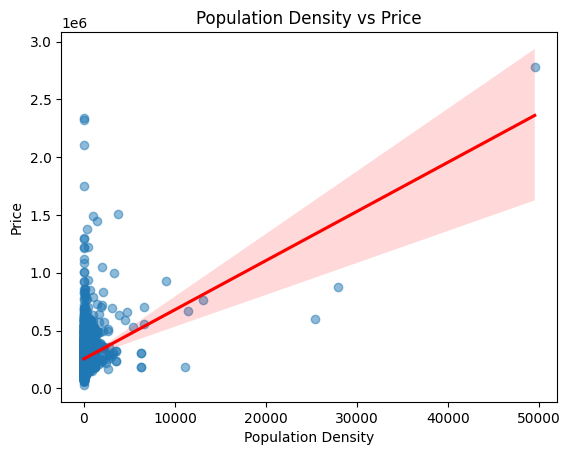

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatterplot with regression line
sns.regplot(x=X['population_density'], y=y, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title("Population Density vs Price")
plt.xlabel("Population Density")
plt.ylabel("Price")
plt.show()


In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Linear Model
lin_model = LinearRegression()
lin_model.fit(X[['population_density']], y)
y_pred_lin = lin_model.predict(X[['population_density']])
mse_lin = mean_squared_error(y, y_pred_lin)
r2_lin = r2_score(y, y_pred_lin)

# Polynomial Model
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X[['population_density']])
poly_model = LinearRegression()
poly_model.fit(X_poly, y)
y_pred_poly = poly_model.predict(X_poly)
mse_poly = mean_squared_error(y, y_pred_poly)
r2_poly = r2_score(y, y_pred_poly)

print(f"Linear Model - MSE: {mse_lin:.2f}, R²: {r2_lin:.2f}")
print(f"Polynomial Model - MSE: {mse_poly:.2f}, R²: {r2_poly:.2f}")

# Log Transformation
X['log_pop_density'] = np.log1p(X['population_density'])
log_model = LinearRegression()
log_model.fit(X[['log_pop_density']], y)
y_pred_log = log_model.predict(X[['log_pop_density']])
mse_log = mean_squared_error(y, y_pred_log)
r2_log = r2_score(y, y_pred_log)

print(f"Log-Transformed Model - MSE: {mse_log:.2f}, R²: {r2_log:.2f}")



Linear Model - MSE: 24590099983.16, R²: 0.12
Polynomial Model - MSE: 24589023134.51, R²: 0.12
Log-Transformed Model - MSE: 26451128820.40, R²: 0.05


/var/folders/nq/n8qjnkmx7wqdsh3y0nxk8tf40000gn/T/ipykernel_4954/1293777292.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['log_pop_density'] = np.log1p(X['population_density'])


## Income

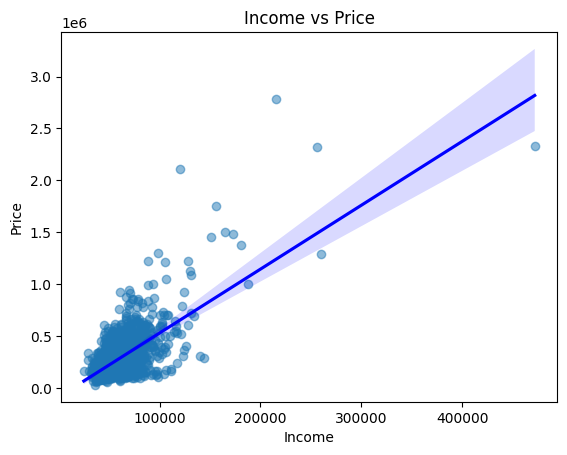

In [30]:
sns.regplot(x=X['income'], y=y, scatter_kws={'alpha':0.5}, line_kws={'color':'blue'})
plt.title("Income vs Price")
plt.xlabel("Income")
plt.ylabel("Price")
plt.show()


In [32]:
# Linear Model
lin_model.fit(X[['income']], y)
y_pred_lin = lin_model.predict(X[['income']])
mse_lin_income = mean_squared_error(y, y_pred_lin)
r2_lin_income = r2_score(y, y_pred_lin)

# Polynomial Model
X_poly_income = poly.fit_transform(X[['income']])
poly_model.fit(X_poly_income, y)
y_pred_poly_income = poly_model.predict(X_poly_income)
mse_poly_income = mean_squared_error(y, y_pred_poly_income)
r2_poly_income = r2_score(y, y_pred_poly_income)

print(f"Linear Model - Income - MSE: {mse_lin_income:.2f}, R²: {r2_lin_income:.2f}")
print(f"Polynomial Model - Income - MSE: {mse_poly_income:.2f}, R²: {r2_poly_income:.2f}")

# Log Transformation
X['log_income'] = np.log1p(X['income'])
log_model.fit(X[['log_income']], y)
y_pred_log_income = log_model.predict(X[['log_income']])
mse_log_income = mean_squared_error(y, y_pred_log_income)
r2_log_income = r2_score(y, y_pred_log_income)

print(f"Log-Transformed Model - Income - MSE: {mse_log_income:.2f}, R²: {r2_log_income:.2f}")


Linear Model - Income - MSE: 15715565919.14, R²: 0.44
Polynomial Model - Income - MSE: 15714627479.79, R²: 0.44
Log-Transformed Model - Income - MSE: 18512099455.06, R²: 0.34


/var/folders/nq/n8qjnkmx7wqdsh3y0nxk8tf40000gn/T/ipykernel_4954/1728490918.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['log_income'] = np.log1p(X['income'])


In [33]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Log-transform the target variable
y_log = np.log1p(y)  # Adding 1 to avoid log(0)

# Initialize a dictionary to store results
results = {}

# Iterate over features
for feature in features:
    X_feature = X[[feature]]

    # 1. Linear Model
    linear_model = LinearRegression()
    linear_model.fit(X_feature, y_log)
    y_pred_linear = linear_model.predict(X_feature)
    mse_linear = mean_squared_error(y_log, y_pred_linear)
    r2_linear = r2_score(y_log, y_pred_linear)
    results[feature] = {'Linear MSE': mse_linear, 'Linear R2': r2_linear}

    # 2. Polynomial Model
    poly = PolynomialFeatures(degree=2, include_bias=False)
    X_poly = poly.fit_transform(X_feature)
    poly_model = LinearRegression()
    poly_model.fit(X_poly, y_log)
    y_pred_poly = poly_model.predict(X_poly)
    mse_poly = mean_squared_error(y_log, y_pred_poly)
    r2_poly = r2_score(y_log, y_pred_poly)
    results[feature].update({'Poly MSE': mse_poly, 'Poly R2': r2_poly})

    # 3. Log-Transformed Model (if applicable)
    if np.all(X_feature > 0):  # Ensure no negative or zero values for log transformation
        X_log = np.log1p(X_feature)
        log_model = LinearRegression()
        log_model.fit(X_log, y_log)
        y_pred_log = log_model.predict(X_log)
        mse_log = mean_squared_error(y_log, y_pred_log)
        r2_log = r2_score(y_log, y_pred_log)
        results[feature].update({'Log MSE': mse_log, 'Log R2': r2_log})

# Display results
for feature, metrics in results.items():
    print(f"\nFeature: {feature}")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")



Feature: risk_score
Linear MSE: 0.1889
Linear R2: 0.0860
Poly MSE: 0.1777
Poly R2: 0.1404
Log MSE: 0.1985
Log R2: 0.0397

Feature: population_density
Linear MSE: 0.1968
Linear R2: 0.0478
Poly MSE: 0.1935
Poly R2: 0.0639
Log MSE: 0.1888
Log R2: 0.0865

Feature: income
Linear MSE: 0.1543
Linear R2: 0.2533
Poly MSE: 0.1495
Poly R2: 0.2768
Log MSE: 0.1514
Log R2: 0.2674

Feature: white_pct
Linear MSE: 0.2047
Linear R2: 0.0098
Poly MSE: 0.1990
Poly R2: 0.0372
Log MSE: 0.2051
Log R2: 0.0076

Feature: black_pct
Linear MSE: 0.2005
Linear R2: 0.0300
Poly MSE: 0.1971
Poly R2: 0.0465

Feature: asian_pct
Linear MSE: 0.1719
Linear R2: 0.1683
Poly MSE: 0.1675
Poly R2: 0.1897

Feature: hispanic_pct
Linear MSE: 0.1983
Linear R2: 0.0405
Poly MSE: 0.1850
Poly R2: 0.1049
Log MSE: 0.1962
Log R2: 0.0507

Feature: ed_pct
Linear MSE: 0.1274
Linear R2: 0.3837
Poly MSE: 0.1274
Poly R2: 0.3837
Log MSE: 0.1324
Log R2: 0.3593

Feature: tax_paid_2022
Linear MSE: 0.1480
Linear R2: 0.2841
Poly MSE: 0.1448
Poly R2: 

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Define features and target
features = ['income', 'unemployment_rate', 'risk_score', 'population_density', 'tax_paid_2022']
target = 'price'

X = model_df[features]
y = model_df[target]

# Scale the target for better numerical stability
y_scaled = (y - y.mean()) / y.std()

# Create interaction terms
X['income_risk_score'] = X['income'] * X['risk_score']
X['unemployment_rate_pop_density'] = X['unemployment_rate'] * X['population_density']
X['income_tax_paid'] = X['income'] * X['tax_paid_2022']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_scaled, test_size=0.2, random_state=42)

# Fit a polynomial regression model with interaction terms
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Train the model
model = LinearRegression()
model.fit(X_poly_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_poly_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output performance metrics
print("Model with Interaction Terms")
print(f"MSE: {mse:.4f}")
print(f"R²: {r2:.4f}")


Model with Interaction Terms
MSE: 1.5593
R²: -0.4913


/var/folders/nq/n8qjnkmx7wqdsh3y0nxk8tf40000gn/T/ipykernel_4954/1980900124.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['income_risk_score'] = X['income'] * X['risk_score']
/var/folders/nq/n8qjnkmx7wqdsh3y0nxk8tf40000gn/T/ipykernel_4954/1980900124.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['unemployment_rate_pop_density'] = X['unemployment_rate'] * X['population_density']
/var/folders/nq/n8qjnkmx7wqdsh3y0nxk8tf40000gn/T/ipykernel_4954/1980900124.py:21: SettingWithCopyWarning: 
A value 

In [44]:
import pandas as pd
from itertools import combinations
import statsmodels.api as sm
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('data/climate_nonnull.csv')

# Define target and feature variables
target = 'price'  
features = ['income', 'risk_score', 'unemployment_rate', 'population_density']  

# Step 1: Generate Interaction Terms (2-way)
for combo in combinations(features, 2):
    interaction_term = f"{combo[0]}_x_{combo[1]}"
    df[interaction_term] = df[combo[0]] * df[combo[1]]

# Step 2: Fit a Model with Interaction Terms
X = df.drop(columns=[target])  # Features and interaction terms
y = df[target]  # Target variable

# Add constant for OLS model
X_with_const = sm.add_constant(X)
model = sm.OLS(y, X_with_const).fit()
print(model.summary())

# Step 3: Cross-Validation for Model Validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lin_model = LinearRegression()

# Cross-validation for 5 folds
mse_scores = -cross_val_score(lin_model, X, y, scoring='neg_mean_squared_error', cv=5)
r2_scores = cross_val_score(lin_model, X, y, scoring='r2', cv=5)

print(f"Cross-Validated MSE: {np.mean(mse_scores):.4f}")
print(f"Cross-Validated R²: {np.mean(r2_scores):.4f}")

# Fit and evaluate on test data
lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)
print(f"Test MSE: {mse_test:.4f}")
print(f"Test R²: {r2_test:.4f}")

# Step 4: Visualize Key Interaction Relationships

interaction_term = 'income_x_unemployment_rate'  
sns.scatterplot(x=df[interaction_term], y=df[target])
plt.title(f"Relationship between {interaction_term} and {target}")
plt.xlabel(interaction_term)
plt.ylabel(target)
plt.show()

# Step 5: Add Higher-Order Interactions (3-way)
for combo in combinations(features, 3):
    interaction_term = f"{combo[0]}_x_{combo[1]}_x_{combo[2]}"
    df[interaction_term] = df[combo[0]] * df[combo[1]] * df[combo[2]]

# Step 6: Fit a Model with Higher-Order Interactions
X_high_order = df.drop(columns=[target])  # Features and interaction terms
X_high_order_with_const = sm.add_constant(X_high_order)
model_high_order = sm.OLS(y, X_high_order_with_const).fit()
print(model_high_order.summary())

# Step 7: Cross-Validation for Higher-Order Model
mse_scores_high_order = -cross_val_score(lin_model, X_high_order, y, scoring='neg_mean_squared_error', cv=5)
r2_scores_high_order = cross_val_score(lin_model, X_high_order, y, scoring='r2', cv=5)

print(f"Cross-Validated MSE (Higher-Order): {np.mean(mse_scores_high_order):.4f}")
print(f"Cross-Validated R² (Higher-Order): {np.mean(r2_scores_high_order):.4f}")

# Compare baseline vs higher-order models
print(f"Improvement in MSE: {np.mean(mse_scores) - np.mean(mse_scores_high_order):.4f}")
print(f"Improvement in R²: {np.mean(r2_scores_high_order) - np.mean(r2_scores):.4f}")


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     220.7
Date:                Fri, 06 Dec 2024   Prob (F-statistic):               0.00
Time:                        12:58:23   Log-Likelihood:                -34719.
No. Observations:                2673   AIC:                         6.948e+04
Df Residuals:                    2654   BIC:                         6.959e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

KeyError: 'income_x_ed_pct'